<a href="https://colab.research.google.com/github/DotBion/fluffy-fishstick/blob/dev-nc3610/Sentiment_analysis_with_twitter_data_for_Apple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
omermetinn_tweets_about_the_top_companies_from_2015_to_2020_path = kagglehub.dataset_download('omermetinn/tweets-about-the-top-companies-from-2015-to-2020')

print('Data source import complete.')


100%|██████████| 278M/278M [00:03<00:00, 76.5MB/s]

Extracting files...


Data source import complete.


In [58]:
# prompt: read the folder to see csv files

import os
print(os.listdir(omermetinn_tweets_about_the_top_companies_from_2015_to_2020_path))


['Tweet.csv', 'Company_Tweet.csv', 'Company.csv']


In [3]:
# prompt: read csv for tweetcsv

import pandas as pd
df = pd.read_csv('omermetinn_tweets_about_the_top_companies_from_2015_to_2020_path/Tweet.csv')
print(df.head())


FileNotFoundError: [Errno 2] No such file or directory: 'omermetinn_tweets_about_the_top_companies_from_2015_to_2020_path/Tweet.csv'

## Sentiment Analysis for "AAPL" using Twitter Data – Yearly Overview

This notebook examines the relationship between Twitter sentiment and stock price.

---

### Part 1: Sentiment Analysis

We use **NLTK's built-in pretrained sentiment analyzer, VADER** (Valence Aware Dictionary and sEntiment Reasoner).  
VADER provides a **'compound' score** for each tweet, ranging from **-1** (most negative) to **+1** (most positive).

---

### Part 2: Stock Price Correlation

We establish the relationship between Twitter sentiment and stock price by analyzing **Apple's stock data**, which is downloaded using the `yfinance` library.


In [59]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as tkr
import seaborn as sns
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
# import tweets
tweets=pd.read_csv('omermetinn_tweets_about_the_top_companies_from_2015_to_2020_path/Tweet.csv')
company_tweet=pd.read_csv('omermetinn_tweets_about_the_top_companies_from_2015_to_2020_path/Company_Tweet.csv')

tweets=tweets.merge(company_tweet,how='left',on='tweet_id')
# format dates
tweets['date'] = pd.to_datetime(tweets['post_date'], unit='s').dt.date
tweets.date=pd.to_datetime( tweets.date,errors='coerce')
tweets['time'] = pd.to_datetime(tweets['post_date'], unit='s').dt.time

FileNotFoundError: [Errno 2] No such file or directory: 'omermetinn_tweets_about_the_top_companies_from_2015_to_2020_path/Tweet.csv'

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)  # Add force_remount=True

Mounted at /content/drive


In [60]:
# import tweets
tweets=pd.read_csv('/content/drive/MyDrive/AAPL-Twitter/Tweet.csv')
company_tweet=pd.read_csv('/content/drive/My Drive/AAPL-Twitter/Company_Tweet.csv')

tweets=tweets.merge(company_tweet,how='left',on='tweet_id')
# format dates
tweets['date'] = pd.to_datetime(tweets['post_date'], unit='s').dt.date
tweets.date=pd.to_datetime( tweets.date,errors='coerce')
tweets['time'] = pd.to_datetime(tweets['post_date'], unit='s').dt.time

<div style="background-color: lightblue; padding: 10px; border: 1px solid blue;">
<h2 style="color: darkblue;">Table/Dataframe for all tweets related to apple in 2018</h2>
<p>View the tweet data for apple below. The data shows twitter handle/name along with the body. The body text is used to estimate the sentiment score.</p>
</div>


In [61]:
tweets.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,date,time
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,2015-01-01,00:00:57
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,2015-01-01,00:01:36
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN,2015-01-01,00:01:50
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA,2015-01-01,00:06:47
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,2015-01-01,00:10:05


In [49]:
tweets.shape

(4336445, 10)

In [51]:
tweets.tail()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,date,time
4336440,1212159838882533376,ShortingIsFun,1577836401,In 2020 I may start Tweeting out positive news...,0,0,1,TSLA,2019-12-31,23:53:21
4336441,1212160015332728833,Commuternyc,1577836443,Patiently Waiting for the no twitter sitter tw...,0,0,5,TSLA,2019-12-31,23:54:03
4336442,1212160410692046849,MoriaCrypto,1577836537,I don't discriminate. I own both $aapl and $ms...,1,0,1,AAPL,2019-12-31,23:55:37
4336443,1212160410692046849,MoriaCrypto,1577836537,I don't discriminate. I own both $aapl and $ms...,1,0,1,MSFT,2019-12-31,23:55:37
4336444,1212160477159206912,treabase,1577836553,"$AAPL #patent 10,522,475 Vertical interconnect...",0,0,0,AAPL,2019-12-31,23:55:53


In [62]:
sia = SentimentIntensityAnalyzer()

#Analyzing only 2018 DATA daywise
def get_sentiment(tweets,ticker='AAPL',start='2018-01-01',end='2018-12-31'):
    #sbuset
    df=tweets.loc[((tweets.ticker_symbol==ticker)&(tweets.date>=start)&(tweets.date<=end))]
    # applt the SentimentIntensityAnalyzer
    df.loc[:,('score')]=df.loc[:,'body'].apply(lambda x: sia.polarity_scores(x)['compound'])
    # create label
    #bins= pd.interval_range(start=-1, freq=3, end=1)
    df.loc[:,('label')]=pd.cut(np.array(df.loc[:,'score']),bins=[-1, -0.66, 0.32, 1],right=True ,labels=["bad", "neutral", "good"])

    df=df.loc[:,["date","score","label","tweet_id","body"]]
    return df

print('apple misses earnings, analyst suggest downgrade , sell now ')
sia.polarity_scores('apple misses earnings, analyst suggest downgrade , sell now ')

apple misses earnings, analyst suggest downgrade , sell now 


{'neg': 0.213, 'neu': 0.787, 'pos': 0.0, 'compound': -0.2263}

<div style="background-color: lightblue; padding: 10px; border: 1px solid blue;">
<h2 style="color: darkblue;">On augmenting the library with stock market jargons / lingo, the sentiment score changes & is a better representation of the actual sentiment</h2>
<p>For the same comments/tweets as in the previous cell, the score becomes more negative (skewed towards negative) after augmenting the library. Notice the results from the below cell.</p>
</div>

In [63]:
# augment vocab

positive_words='high profit Growth Potential Opportunity Bullish Strong Valuable Success Promising Profitable Win Winner Outstanding Record Earnings Breakthrough buy bull long support undervalued underpriced cheap upward rising trend moon rocket hold breakout call beat support buying holding'
negative_words='resistance squeeze cover seller Risk Loss Decline Bearish Weak Declining Uncertain Troubling Downturn Struggle Unstable Volatile Slump Disaster Plunge sell bear bubble bearish short overvalued overbought overpriced expensive downward falling sold sell low put miss'

dictOfpos = { i : 4 for i in positive_words.split(" ") }
dictOfneg = { i : -4 for i in negative_words.split(" ")  }
Financial_Lexicon = {**dictOfpos, **dictOfneg}

sia.lexicon.update(Financial_Lexicon)


print('apple misses earnings, analyst suggest downgrade , sell now ')
sia.polarity_scores('apple misses earnings, analyst suggest downgrade , sell now ')

apple misses earnings, analyst suggest downgrade , sell now 


{'neg': 0.535, 'neu': 0.465, 'pos': 0.0, 'compound': -0.7845}

<div style="background-color: lightblue; padding: 10px; border: 1px solid blue;">
<h2 style="color: darkblue;">NOTE</h2>
<p>Below table highlights the sentiment score and the label as estimated using the nltk pre-trained library VADER..</p>
</div>



In [65]:
start='2018-01-01'
end='2018-12-31'
ticker='AAPL'
tw=get_sentiment(tweets,ticker,start,end) # get tweets
tw.head()

<ipython-input-62-cfbd753b7031>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,('score')]=df.loc[:,'body'].apply(lambda x: sia.polarity_scores(x)['compound'])
<ipython-input-62-cfbd753b7031>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,('label')]=pd.cut(np.array(df.loc[:,'score']),bins=[-1, -0.66, 0.32, 1],right=True ,labels=["bad", "neutral", "good"])


,date,score,label,tweet_id,body
2516892,2018-01-01,0.8807,good,947619846124122113,How is $AAPL @Apple going to get me to buy a #...
2516898,2018-01-01,-0.3612,neutral,947622772800450561,"$IBM settled -0.4% at $153.42, making for a 20..."
2516900,2018-01-01,0.0000,neutral,947623169241821184,"$AAPL 2018, with 3 new handsets and possibly a..."
2516909,2018-01-01,0.8561,good,947626570226728960,Start investing @RobinhoodApp and get a stock ...
2516910,2018-01-01,0.4981,good,947626976642248704,JOIN NOW! TALK STOCKS IN OUR GOAL ORIENTED CHA...


<div style="background-color: lightblue; padding: 10px; border: 1px solid blue;">
<h2 style="color: darkblue;">Exhibit</h2>
<p>Distribution of positive, negative & neutral sentiment by each day.</p>
</div>

<ipython-input-13-5646401444f3>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sentiment_counts = tw.groupby(['date', 'label']).size().unstack(fill_value=0)


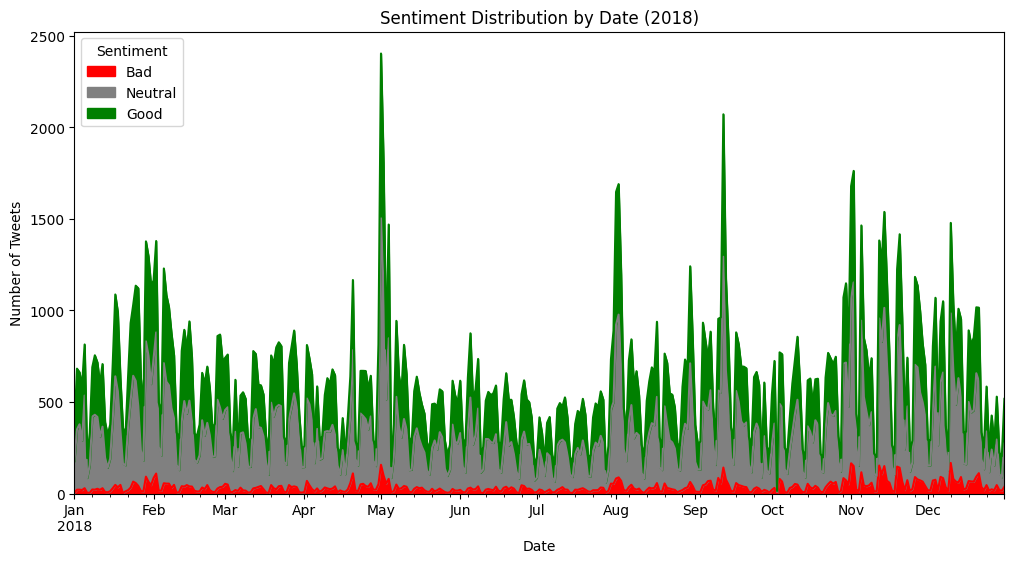

In [13]:
import matplotlib.patches as mpatches

# Convert the 'date' column to datetime objects
tw['date'] = pd.to_datetime(tw['date'])

# Group the data by date and 'label' and count the number of tweets
sentiment_counts = tw.groupby(['date', 'label']).size().unstack(fill_value=0)

# Create an area chart
fig, ax = plt.subplots(figsize=(12, 6))

# Set colors for 'good,' 'neutral,' and 'bad'
colors = {'good': 'green', 'neutral': 'grey', 'bad': 'red'}

area = sentiment_counts.plot.area(stacked=True, ax=ax, color=[colors[c] for c in sentiment_counts.columns])

# Customize the legend
handles = [mpatches.Patch(color=colors[label], label=label.capitalize()) for label in sentiment_counts.columns]
ax.legend(handles=handles, title='Sentiment', loc="upper left")

# Customize the chart
plt.title('Sentiment Distribution by Date (2018)')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')

plt.show()


<div style="background-color: lightblue; padding: 10px; border: 1px solid blue;">
<h2 style="color: darkblue;">NOTE</h2>
<p>The sentiment score is created for each tweet and hence there are multiple sentiment scores for each day. The below code averages out the sentiment score for each day. The average score is then plotted as a line graph. It is noted that the average sentiment score is always positive due to the fact that the overall sentiment score for each day throughout the year is positive (or in other words, there are more positive or neutral tweets that negative tweets). This can also be observed in the above chart which highlights the frequency of positive, negative & neutral tweets.</p>
</div>




In [66]:
# Convert the 'date' column to datetime objects
tw['date'] = pd.to_datetime(tw['date'])

# Group the data by date and calculate the average sentiment score for each day
daily_sentiment = tw.groupby(tw['date'].dt.date)['score'].mean()

daily_sentiment_df = pd.DataFrame({'Date': daily_sentiment.index, 'Average Score': daily_sentiment.values})

# Print the resulting DataFrame
daily_sentiment_df.head()

,Date,Average Score
0,2018-01-01,0.380360
1,2018-01-02,0.325566
2,2018-01-03,0.256721
3,2018-01-04,0.330698
4,2018-01-05,0.187864


In [68]:

# Export to CSV
daily_sentiment_df.to_csv('daily_sentiment.csv', index=False)


<div style="background-color: lightblue; padding: 10px; border: 1px solid blue;">
<h2 style="color: darkblue;">Exhibit</h2>
<p>Average sentiment score for tweets related to Apple for each day of the year 2018.</p>
</div>

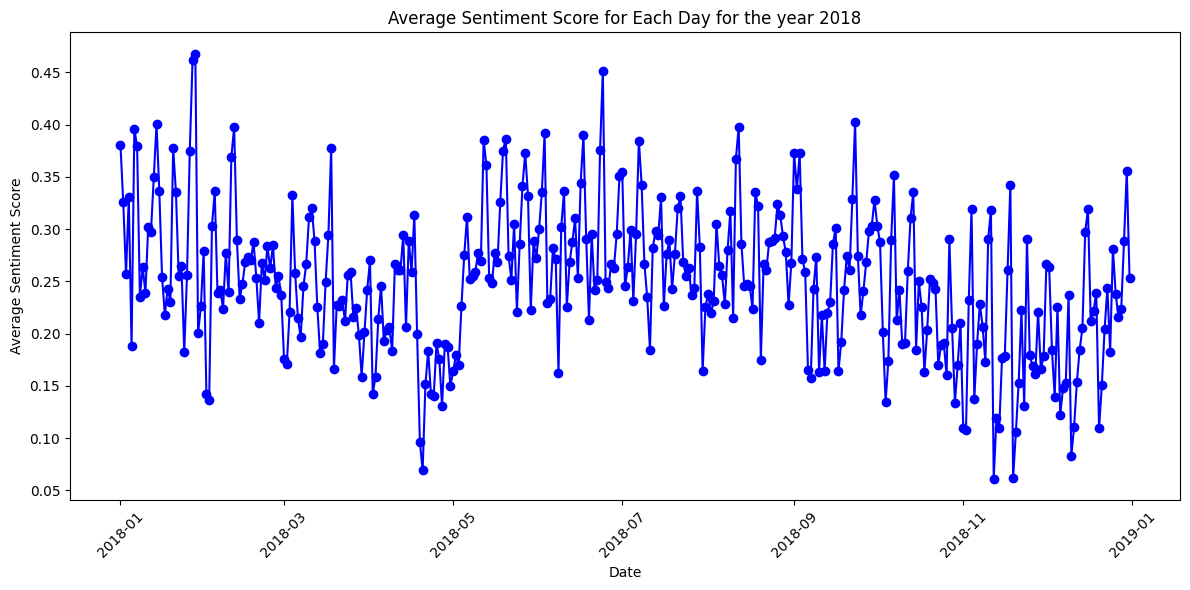

In [67]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the average sentiment scores
ax.plot(daily_sentiment.index, daily_sentiment, marker='o', linestyle='-', color='b')

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Average Sentiment Score')
plt.title('Average Sentiment Score for Each Day for the year 2018')

# Format x-axis date labels
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

In [16]:
!pip install yfinance

<div style="background-color: lightblue; padding: 10px; border: 1px solid blue;">
<h2 style="color: darkblue;">The apple stock data is obtained from yfinance.</h2>
<p>1. The first plot highlights the stock price since beginning.
2. The second plot higlights the stock price change over 2018 (full year).</p>
</div>

In [19]:
import yfinance as yf
aapl = yf.Ticker("AAPL")
hist = aapl.history(period="max")
hist["Open"].plot(figsize=(15, 5), title="AAPL Stock Price")
plt.show()

YFRateLimitError: Too Many Requests. Rate limited. Try after a while.

In [20]:
import yfinance as yf
import time

aapl = yf.Ticker("AAPL")

# Introduce a delay before making the request
time.sleep(5)  # Wait for 5 seconds

hist = aapl.history(period="max")
hist["Open"].plot(figsize=(15, 5), title="AAPL Stock Price")
plt.show()

YFRateLimitError: Too Many Requests. Rate limited. Try after a while.

In [ ]:
#AlphaVantage-API: D4FOXZ3SY45T4YFI

In [22]:
def get_stock_daily_data(symbol: str):
    """
    Fetches daily historical data for a given symbol using yfinance.
    Retrieves approximately one year of data.

    Returns:
      - A DataFrame with date-indexed daily data containing columns like Close and Volume.
    """
    ticker = yf.Ticker(symbol)
    # Download ~1 year of historical data with daily resolution.
    df = ticker.history(period="1y", interval="1d")

    if df.empty:
        print(f"Error: No data found for {symbol} in the specified date range.")
        return None

    # Format the index to a string date format (YYYY-MM-DD)
    df.index = df.index.strftime('%Y-%m-%d')
    return df

In [24]:
import yfinance as yf

def get_stock_daily_data(ticker):
    stock = yf.Ticker(ticker)
    df = stock.history(period="1y")
    return df


In [ ]:
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt

# Replace 'YOUR_API_KEY' with your actual API key
ts = TimeSeries(key='D4FOXZ3SY45T4YFI', output_format='pandas')

# Get intraday data for Microsoft (MSFT) with 1-minute intervals
data, meta_data = ts.get_intraday(symbol='AAPL', interval='1min', outputsize='full')

# Plot the closing prices
data['close'].plot()
plt.title('Intraday Time Series for MSFT (1 min)')
plt.show()

In [25]:
get_stock_daily_data("AAPL")

YFRateLimitError: Too Many Requests. Rate limited. Try after a while.

In [26]:
!pip install alpha-vantage

In [27]:
# prompt: use alpha vantage api to download apple stock data for the year 2018

from alpha_vantage.timeseries import TimeSeries
import pandas as pd

# Replace 'YOUR_API_KEY' with your actual Alpha Vantage API key
api_key = 'D4FOXZ3SY45T4YFI'  # Replace with your actual API key

ts = TimeSeries(key=api_key, output_format='pandas')

try:
    data, meta_data = ts.get_daily(symbol='AAPL', outputsize='full')

    # Convert the index to datetime objects
    data.index = pd.to_datetime(data.index)

    # Filter data for the year 2018
    data_2018 = data[(data.index >= '2018-01-01') & (data.index <= '2018-12-31')]

    print(data_2018)

except Exception as e:
    print(f"An error occurred: {e}")


            1. open  2. high  3. low  4. close   5. volume
date                                                      
2018-12-31   158.53   159.36  156.48    157.74  35003466.0
2018-12-28   157.50   158.52  154.55    156.23  42291424.0
2018-12-27   155.84   156.77  150.07    156.15  53117065.0
2018-12-26   148.30   157.23  146.72    157.17  58582544.0
2018-12-24   148.15   151.55  146.59    146.83  37169232.0
...             ...      ...     ...       ...         ...
2018-01-08   174.35   175.61  173.93    174.35  20134092.0
2018-01-05   173.44   175.37  173.05    175.00  23016177.0
2018-01-04   172.54   173.47  172.08    173.03  22211345.0
2018-01-03   172.53   174.55  171.96    172.23  28819653.0
2018-01-02   170.16   172.30  169.26    172.26  25048048.0

[251 rows x 5 columns]


In [33]:
# prompt: rename the columns without the numbers

# Rename columns in the 'tw' DataFrame
data_2018 = data_2018.rename(columns={
    '1. open': 'open',
    '2. high': 'high',
    '3. low': 'low',
    '4. close': 'close',
    '5. volume': 'volume'
})


In [34]:
data_2018.head()

,open,high,low,close,volume
date,,,,,
2018-12-31,158.53,159.36,156.48,157.74,35003466.0
2018-12-28,157.50,158.52,154.55,156.23,42291424.0
2018-12-27,155.84,156.77,150.07,156.15,53117065.0
2018-12-26,148.30,157.23,146.72,157.17,58582544.0
2018-12-24,148.15,151.55,146.59,146.83,37169232.0


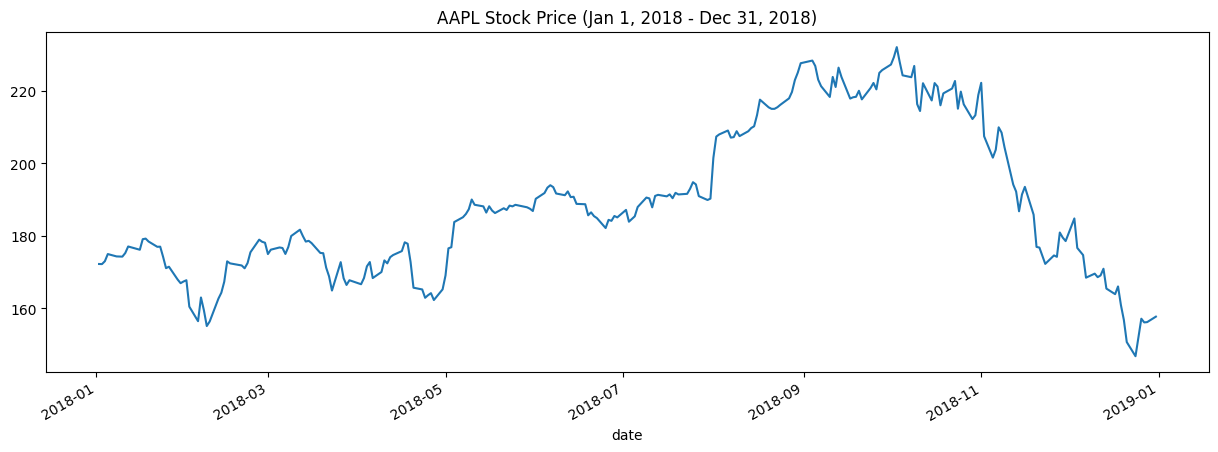

In [37]:
# Define the stock symbol and date range
stock_symbol = "AAPL"
start_date = "2018-01-01"
end_date = "2018-12-31"

# Create a Ticker object for the stock
# stock = yf.Ticker(stock_symbol)

# Fetch historical data for the specified date range
# hist = stock.history(period="1d", start=start_date, end=end_date)

# Plot the opening prices for the specified date range
data_2018["close"].plot(figsize=(15, 5), title=f"{stock_symbol} Stock Price (Jan 1, 2018 - Dec 31, 2018)")
plt.show()

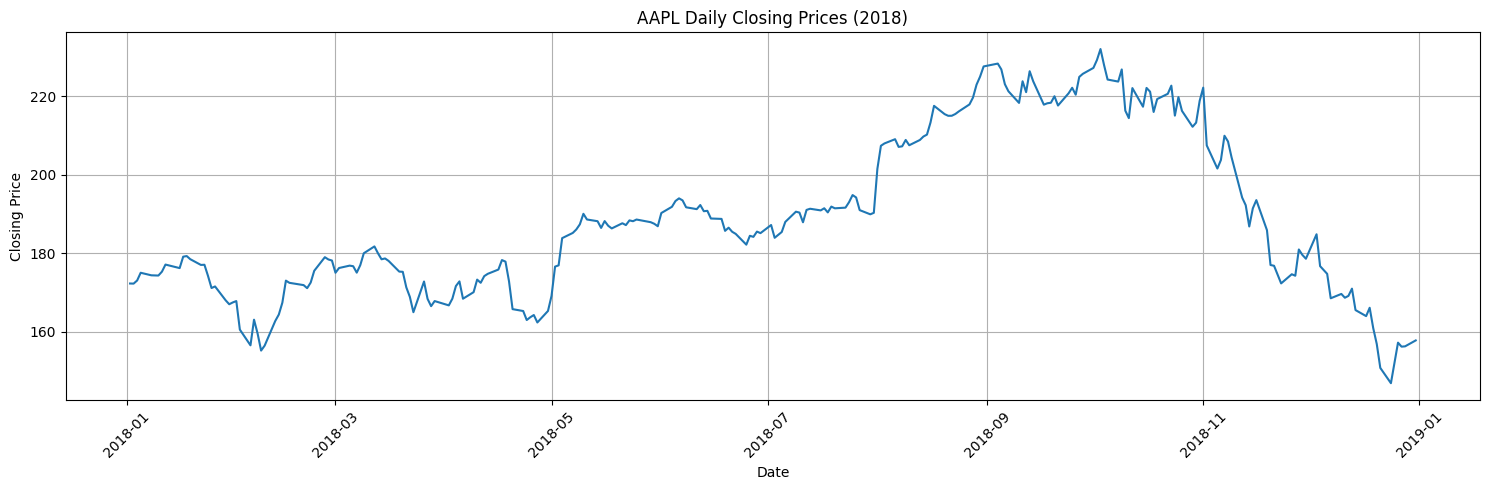

In [31]:
# prompt: plot the daily close

# Assuming 'data_2018' DataFrame from the previous code is available.
# If not, replace with your DataFrame containing the stock data.

plt.figure(figsize=(15, 5))
plt.plot(data_2018.index, data_2018['close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('AAPL Daily Closing Prices (2018)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [39]:
# Define the start and end dates
start_date = '2018-01-01'
end_date = '2018-12-31'

# Create a date range covering the full date range (including weekends and holidays)
date_range = pd.date_range(start=start_date, end=end_date)

# Create a new DataFrame with the full date range
full_hist = pd.DataFrame(index=date_range)

# Ensure that the timezone information for both DataFrames matches
full_hist.index = full_hist.index.tz_localize(data_2018.index.tz)

# Merge or combine the new DataFrame with the existing 'hist' DataFrame
full_hist = full_hist.combine_first(data_2018)

# Now, 'full_hist' contains all dates within the specified date range
# with weekends and holidays included, and missing values are filled with NaN.

# If you want to fill NaN values with 0, you can do:
full_hist = full_hist.fillna(0)

# Print or use the updated DataFrame 'full_hist'
full_hist.head()


,close,high,low,open,volume
2018-01-01,0.00,0.00,0.00,0.00,0.0
2018-01-02,172.26,172.30,169.26,170.16,25048048.0
2018-01-03,172.23,174.55,171.96,172.53,28819653.0
2018-01-04,173.03,173.47,172.08,172.54,22211345.0
2018-01-05,175.00,175.37,173.05,173.44,23016177.0


<div style="background-color: lightblue; padding: 10px; border: 1px solid blue;">
<h2 style="color: darkblue;">Exhibit</h2>
<p>Plotting the sentiment and the stock price in one chart so as to spot any trend/patterns between the two, through manual eye-balling
.</p>
</div>

In [48]:
print(full_hist.shape)
full_hist.head()

(365, 5)


,close,high,low,open,volume
2018-01-01,0.00,0.00,0.00,0.00,0.0
2018-01-02,172.26,172.30,169.26,170.16,25048048.0
2018-01-03,172.23,174.55,171.96,172.53,28819653.0
2018-01-04,173.03,173.47,172.08,172.54,22211345.0
2018-01-05,175.00,175.37,173.05,173.44,23016177.0


In [53]:
# prompt: export full_hist as csv

full_hist.to_csv('full_hist.csv')


In [47]:
print(daily_sentiment_df.shape)
daily_sentiment_df.head()

(365, 2)


,Date,Average Score
0,2018-01-01,0.380360
1,2018-01-02,0.325566
2,2018-01-03,0.256721
3,2018-01-04,0.330698
4,2018-01-05,0.187864


In [55]:
# prompt: add the tweets text to daily_sentiment_df

# Assuming 'daily_sentiment_df' and 'tweets' DataFrames are already defined.

# Convert 'Date' column in daily_sentiment_df to datetime
daily_sentiment_df['Date'] = pd.to_datetime(daily_sentiment_df['Date'])

# Merge the 'tweets' text data with the daily sentiment DataFrame based on the date.
daily_sentiment_df = pd.merge(daily_sentiment_df, tweets[['date', 'body']], left_on='Date', right_on='date', how='left')

# Display the updated DataFrame
print(daily_sentiment_df.head())

        Date  Average Score       date  \
0 2018-01-01        0.38036 2018-01-01   
1 2018-01-01        0.38036 2018-01-01   
2 2018-01-01        0.38036 2018-01-01   
3 2018-01-01        0.38036 2018-01-01   
4 2018-01-01        0.38036 2018-01-01   

                                                body  
0  The 7 Greatest Tech Stocks of All Time monitor...  
1  The 7 Greatest Tech Stocks of All Time monitor...  
2  Don't miss our next FREE OPTION TRADE.  Sign u...  
3  How is $AAPL @Apple going to get me to buy a #...  
4  How is $AAPL @Apple going to get me to buy a #...  


In [57]:
daily_sentiment_df.shape

(914245, 4)

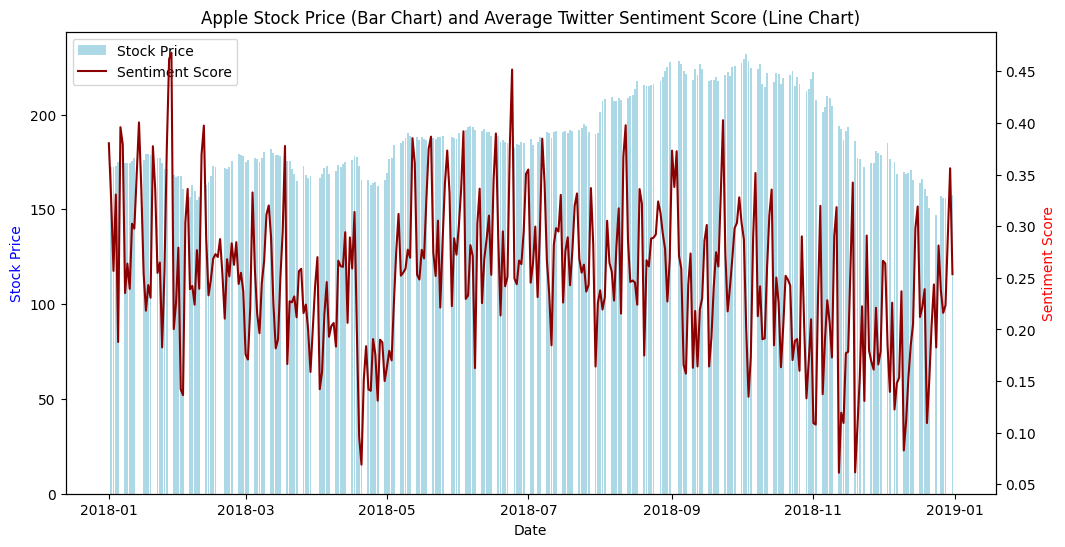

In [41]:
import matplotlib.pyplot as plt

# Extract data from dataframes
dates = full_hist.index
stock_prices = c['close']
sentiment_scores = daily_sentiment_df['Average Score']

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot stock prices as a bar chart on the first axis (left y-axis)
ax1.bar(dates, stock_prices, color='lightblue', label='Stock Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('Stock Price', color='b')

# Create a second axis (right y-axis) for sentiment scores
ax2 = ax1.twinx()
ax2.plot(dates, sentiment_scores, color='darkred', label='Sentiment Score')
ax2.set_ylabel('Sentiment Score', color='r')

# Add a legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

# Set a title
plt.title('Apple Stock Price (Bar Chart) and Average Twitter Sentiment Score (Line Chart)')

# Show the plot
plt.show()

In [70]:
full_hist.shape

(365, 5)

In [74]:
# prompt: I wan to remove the last 65 data points and store it seperately

# Assuming 'full_hist' DataFrame is already defined as in your provided code.

# Number of data points to remove from the end
num_points_to_remove = 65

# Separate the last 65 data points
last_65_points = daily_sentiment.tail(num_points_to_remove)

# Remove the last 65 points from the original DataFrame
daily_sentiment = daily_sentiment[:-num_points_to_remove]

# Now 'full_hist' contains the data without the last 65 points,
# and 'last_65_points' contains the removed data.

print("Original DataFrame shape (after removing last 65 points):", full_hist.shape)
print("Last 65 points DataFrame shape:", last_65_points.shape)


Original DataFrame shape (after removing last 65 points): (300, 5)
Last 65 points DataFrame shape: (65,)


In [73]:
# prompt: export last 65 as csv

# Assuming 'last_65_points' DataFrame is defined as in the previous code.

# Export the last 65 points to a CSV file
last_65_points.to_csv('last_65_points.csv', index=True)  # index=True to include the date index


In [86]:
full_hist.head()

,close,high,low,open,volume
Date,,,,,
2018-01-01,0.00,0.00,0.00,0.00,0.0
2018-01-02,172.26,172.30,169.26,170.16,25048048.0
2018-01-03,172.23,174.55,171.96,172.53,28819653.0
2018-01-04,173.03,173.47,172.08,172.54,22211345.0
2018-01-05,175.00,175.37,173.05,173.44,23016177.0


In [85]:
# prompt: rename the index columns as date

# Assuming 'full_hist' DataFrame is already defined as in your provided code.

# Rename the index column to 'date'
full_hist.index.name = 'Date'


In [88]:
# prompt: lstm model trained on full_hist.csv

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load the data
# The 'index_col' argument was removed to avoid the error.
# Pandas will automatically use the first column as the index.
# if the index name is date, specify it as index_col = 0
df = pd.read_csv('full_hist.csv', index_col=0)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['close'].values.reshape(-1, 1))

# Prepare the data for LSTM
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 20  # Number of previous days to consider
X_train, Y_train = create_dataset(train_data, look_back)
X_test, Y_test = create_dataset(test_data, look_back)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, Y_train, epochs=100, batch_size=32) # Adjust epochs and batch_size as needed


# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - loss: 0.3443
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1745
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1582
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1527
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.1468
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1499
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1473
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1380
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1460
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1548
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1431
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1422
Epoch 13/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1430
Epoch 14/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1445
Epoch 15/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1414
Epoch 16/100
9/9 ━━━━━━━━━━━━━━

In [89]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


ValueError: Found array with dim 3. None expected <= 2.

In [90]:
# prompt: evaluate predictions

import numpy as np
from sklearn.metrics import mean_squared_error

# Calculate RMSE for training and testing sets
train_rmse = np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0]))
test_rmse = np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0]))

print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')


Train RMSE: 31.623469965524784
Test RMSE: 138.05192531989593


In [92]:
# prompt: write a code to predict the price for the next day along with the date

# Assuming 'df' is your DataFrame with 'Date' and 'close' columns
# and 'model', 'scaler', 'look_back' are defined as in your previous code.

# Get the last 'look_back' days of data
last_lookback_days = df['close'].tail(look_back).values.reshape(-1, 1)

# Scale the last 'look_back' days
scaled_last_lookback_days = scaler.transform(last_lookback_days)

# Reshape the data
X_next_day = np.reshape(scaled_last_lookback_days, (1, look_back, 1))

# Predict the next day's closing price
next_day_prediction_scaled = model.predict(X_next_day)

# Inverse transform to get the actual price
next_day_prediction = scaler.inverse_transform(next_day_prediction_scaled)[0, 0]

# Get the date for the next day
last_date = pd.to_datetime(df.index[-1])
next_day_date = last_date + pd.DateOffset(days=1)


print(f"Predicted price for {next_day_date.strftime('%Y-%m-%d')}: {next_day_prediction}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Predicted price for 2019-01-01: 159.9531707763672


In [93]:
# prompt: actual price of the next day along with the date

# Assuming 'df' is your DataFrame with 'Date' as the index and 'close' as the column
# and 'model', 'scaler', 'look_back' are defined as in your previous code.

# Get the last 'look_back' days of data
last_lookback_days = df['close'].tail(look_back).values.reshape(-1, 1)

# Scale the last 'look_back' days
scaled_last_lookback_days = scaler.transform(last_lookback_days)

# Reshape the data
X_next_day = np.reshape(scaled_last_lookback_days, (1, look_back, 1))

# Predict the next day's closing price
next_day_prediction_scaled = model.predict(X_next_day)

# Inverse transform to get the actual price
next_day_prediction = scaler.inverse_transform(next_day_prediction_scaled)[0, 0]

# Get the date for the next day
last_date = pd.to_datetime(df.index[-1])
next_day_date = last_date + pd.DateOffset(days=1)

print(f"Predicted price for {next_day_date.strftime('%Y-%m-%d')}: {next_day_prediction}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted price for 2019-01-01: 159.9531707763672


In [96]:
# prompt: predict the price for 2018-01-19

# Assuming 'df' is your DataFrame with 'Date' as the index and 'close' as the column
# and 'model', 'scaler', 'look_back' are defined as in your previous code.
# Also assuming that 'df' has been loaded with the correct index.

# Convert the index to datetime if it's not already
df.index = pd.to_datetime(df.index)

# Find the date closest to 2018-01-19
target_date = pd.to_datetime('2018-01-24')
closest_date = min(df.index, key=lambda x: abs(x - target_date))

# Get the last 'look_back' days of data leading up to the closest date
# Adjust look_back if there is not enough data
available_data_points = len(df['close'].loc[:closest_date])
look_back_adjusted = min(look_back, available_data_points)

try:
  last_lookback_days = df['close'].loc[:closest_date].tail(look_back_adjusted).values.reshape(-1, 1)
except KeyError:
  print("Error: 'close' column not found in the DataFrame.")
  # Handle the error appropriately, e.g., exit or use a default value.
  exit()


# Scale the last 'look_back' days
scaled_last_lookback_days = scaler.transform(last_lookback_days)

# Reshape the data, using look_back_adjusted
X_next_day = np.reshape(scaled_last_lookback_days, (1, look_back_adjusted, 1))

# Predict the next day's closing price
next_day_prediction_scaled = model.predict(X_next_day)

# Inverse transform to get the actual price
next_day_prediction = scaler.inverse_transform(next_day_prediction_scaled)[0, 0]

print(f"Predicted price for {target_date.strftime('%Y-%m-%d')}: {next_day_prediction}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted price for 2018-01-24: 187.85012817382812


In [ ]:
# prompt: generate predictions for the prices from the lat_65_points.csv

# Load the last 65 points data
last_65_points_df = pd.read_csv('last_65_points.csv', index_col='Date', parse_dates=True)

# Prepare the data for prediction
inputs = last_65_points_df['score'].values.reshape(-1, 1)
inputs = scaler.transform(inputs)
print(inputs)
X_test = []
for i in range(look_back, len(inputs)):
    X_test.append(inputs[i-look_back:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Print or use the predictions
predictions
